In [1]:
# !conda activate syntheseus

from ppo import main

2023-07-16 12:20:52.842400: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-16 12:20:52.844105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 12:20:52.876526: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 12:20:52.877141: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 12:20:53.482321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
main()

Training Actor
0/25 DONE 2.324005603790283
1/25 DONE 1.4472681283950806
2/25 DONE 2.347846269607544
3/25 DONE 2.1723458766937256
4/25 DONE 2.3747713565826416
5/25 DONE 2.730302572250366
6/25 DONE 1.7862374782562256
7/25 DONE 2.723750591278076
8/25 DONE 2.189253807067871
9/25 DONE 2.6160314083099365
10/25 DONE 2.7218217849731445
11/25 DONE 2.4871699810028076
12/25 DONE 2.0427982807159424
13/25 DONE 2.716747283935547
14/25 DONE 2.5111143589019775
15/25 DONE 2.5602450370788574
16/25 DONE 2.730086326599121
17/25 DONE 2.728684663772583
18/25 DONE 2.374800443649292
19/25 DONE 2.315443515777588
20/25 DONE 2.7304465770721436
21/25 DONE 2.7293341159820557
22/25 DONE 2.5680694580078125
23/25 DONE 2.7304465770721436
24/25 DONE 2.730445623397827
Training Critic
0/25 Done 353.2809143066406
1/25 Done 353.27813720703125
2/25 Done 353.27813720703125
3/25 Done 353.28057861328125
4/25 Done 353.289306640625
5/25 Done 353.2750549316406
6/25 Done 353.2751770019531
7/25 Done 353.27490234375
8/25 Done 353.28

KeyboardInterrupt: 

In [1]:
from GNN_utils import *

from paroutes import PaRoutesInventory, PaRoutesModel, get_target_smiles


model = torch.load('GNN_split_Model.pth')
# model_critic = GATCritic(9,1)
inventory = get_target_smiles(5)
index=2160

In [2]:
inventory[index]

'O=C1c2c(Br)cccc2CN1CCc1cccc(-c2ncccn2)c1'

In [14]:
edges = model(convert_smiles_to_pyg_graph('S=C=Nc1ccccc1'))


IndexError: tensors used as indices must be long, byte or bool tensors

In [6]:
from split_environment import *

In [7]:
env = SASEnvironment(inventory)

In [8]:
action = np.argmax(edges.detach().numpy())

In [9]:
action

bond = get_BRICS_bonds(Chem.MolFromSmiles('Oc1ccc(C2CC(c3ccccc3)=NN2C(=S)Nc2ccccc2)cc1'))

bond = [list(i[0]) for i in bond]
bond.sort()
bond = bond[action]

In [10]:
t = env.step([bond],'Oc1ccc(C2CC(c3ccccc3)=NN2C(=S)Nc2ccccc2)cc1')

([<rdkit.Chem.rdchem.Mol object at 0x7f1c5a58a960>, <rdkit.Chem.rdchem.Mol object at 0x7f1c5a5880b0>], -2.6524797682746044, False)
-2.56341209020626


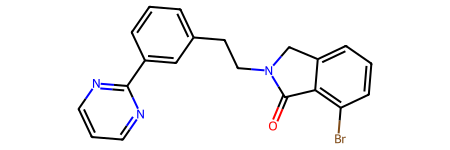

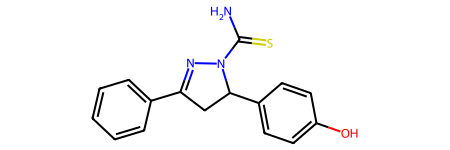

-2.6524797682746044


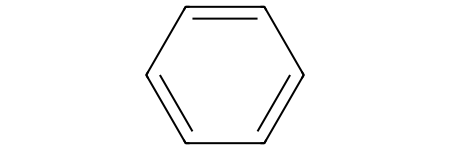

-1.0


In [13]:
print(t)

print(reward_func([Chem.MolFromSmiles('Oc1ccc(C2CC(c3ccccc3)=NN2C(=S)Nc2ccccc2)cc1')],'sas'))
display(Chem.MolFromSmiles(inventory[index]))

for i in t[0]:
    display(i)
    print(reward_func([i],'sas'))